In [6]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tslearn.clustering import TimeSeriesKMeans
plt.rcParams["figure.figsize"] = (20,10)

/home/oliver/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.cluster.k_means_ module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)
/home/oliver/.local/lib/python3.7/site-packages/tslearn/bases.py:14: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


In [7]:
# load scalar data set
data_set_scalar = pd.read_pickle("data_set_scalar_3.pickle")
data_set_scalar

deveui   humidite  temperature                    time  \
0      70b3d54993d84e95  27.573000    23.950001 2020-03-02 17:06:08.778   
1      70b3d54993d84e95  27.927000    23.219999 2020-03-02 17:18:13.713   
2      70b3d54993d84e95  28.301001    22.980000 2020-03-02 17:23:51.843   
3      70b3d54993d84e95  28.627001    22.790001 2020-03-02 17:29:19.713   
4      70b3d54993d84e95  28.657000    22.639999 2020-03-02 17:34:57.718   
...                 ...        ...          ...                     ...   
52753  70b3d54991f30a79  15.762848    32.365570 2020-03-26 09:48:48.610   
52754  70b3d54991f30a79  15.770477    32.397751 2020-03-26 09:54:22.608   
52755  70b3d54991f30a79  15.686554    32.515724 2020-03-26 10:00:01.779   
52756  70b3d54991f30a79  15.625519    32.537178 2020-03-26 10:05:40.669   
52757  70b3d54991f30a79  15.503448    32.730225 2020-03-26 10:11:09.670   

       lorarssi  lorasnr     pression  
0           -64      7.8   993.850952  
1           -46      8.0   995.154236  
2           -49      6.8   995.760376  
3           -47      9.5   996.153198  
4           -49      7.0   996.575562  
...         ...      ...          ...  
52753       -53      8.5  1013.804993  
52754       -56     10.5  1013.880005  
52755       -53      9.0  1013.837524  
52756       -54      8.8  1013.792480  
52757       -56     10.2  1013.669983  

[52758 rows x 7 columns]

In [8]:
# Get metadata
import csv
localisation={}
pokemon={}
headers=[]
with open('inventaire_3.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count==0:
            for column in row:
                headers.append(column)
        else:
            if row[1] not in pokemon:
                localisation[row[1]]={}
                pokemon[row[1]]={}
                pokemon[row[1]]=row[0]
                localisation[row[1]]=row[4]
        line_count+=1
print(pokemon)

{'70b3d54991b49627': 'Kapoera', '70b3d54991f30a79': 'Bébécaille', '70b3d54990d7fe91': 'Judokrak', '70b3d5499919e4fc': 'Natu', '70b3d5499abc2837': 'Bouldeneu', '70b3d54994c61237': 'Gringolem', '70b3d54993d84e95': 'Chenipan', '70b3d54998307fd8': 'Barpau', '70b3d5499ad71b3b': 'Roitiflam', '70b3d54990b67878': 'Tritox', '70b3d54993927fb7': 'Spectrum', '70b3d54996efbc6b': 'Hypotrempe'}


In [9]:
# Add metadata do DataFrame
data_set_scalar['localisation'] = data_set_scalar['deveui'].map(localisation)
data_set_scalar['pokemon'] = data_set_scalar['deveui'].map(pokemon)
data_set_scalar

deveui   humidite  temperature                    time  \
0      70b3d54993d84e95  27.573000    23.950001 2020-03-02 17:06:08.778   
1      70b3d54993d84e95  27.927000    23.219999 2020-03-02 17:18:13.713   
2      70b3d54993d84e95  28.301001    22.980000 2020-03-02 17:23:51.843   
3      70b3d54993d84e95  28.627001    22.790001 2020-03-02 17:29:19.713   
4      70b3d54993d84e95  28.657000    22.639999 2020-03-02 17:34:57.718   
...                 ...        ...          ...                     ...   
52753  70b3d54991f30a79  15.762848    32.365570 2020-03-26 09:48:48.610   
52754  70b3d54991f30a79  15.770477    32.397751 2020-03-26 09:54:22.608   
52755  70b3d54991f30a79  15.686554    32.515724 2020-03-26 10:00:01.779   
52756  70b3d54991f30a79  15.625519    32.537178 2020-03-26 10:05:40.669   
52757  70b3d54991f30a79  15.503448    32.730225 2020-03-26 10:11:09.670   

       lorarssi  lorasnr     pression localisation     pokemon  
0           -64      7.8   993.850952                 Chenipan  
1           -46      8.0   995.154236                 Chenipan  
2           -49      6.8   995.760376                 Chenipan  
3           -47      9.5   996.153198                 Chenipan  
4           -49      7.0   996.575562                 Chenipan  
...         ...      ...          ...          ...         ...  
52753       -53      8.5  1013.804993           B3  Bébécaille  
52754       -56     10.5  1013.880005           B3  Bébécaille  
52755       -53      9.0  1013.837524           B3  Bébécaille  
52756       -54      8.8  1013.792480           B3  Bébécaille  
52757       -56     10.2  1013.669983           B3  Bébécaille  

[52758 rows x 9 columns]

In [12]:
# Create colors for clusters
colors={}
colors_device={}
list_colors=['blue','green','red','yellow','purple','black']
i=0
for loc in  localisation:
    if localisation[loc] not in colors:
        colors[localisation[loc]]=list_colors[i]
        i+=1
        print(localisation[loc])
for color in colors:
    for eui in pokemon:
        if localisation[eui]==color:
            colors_device[pokemon[eui]]=colors[color]
print(colors_device)

linestyles={}
linestyles_device={}
list_linestyles = ['-', '--', '-.', ':']
i=0
for loc in  localisation:
    if localisation[loc] not in linestyles:
        linestyles[localisation[loc]]=list_linestyles[i]
        i+=1
        print(localisation[loc])
for linestyle in linestyles:
    for eui in pokemon:
        if localisation[eui]==linestyle:
            linestyles_device[pokemon[eui]]=linestyles[linestyle]
print(linestyles_device)

A3
B3
B2
B4
B1

A5
A2
A1
A4
{'Kapoera': 'blue', 'Bébécaille': 'green', 'Judokrak': 'red', 'Natu': 'yellow', 'Bouldeneu': 'purple', 'Gringolem': 'black', 'Chenipan': 'black', 'Barpau': 'black', 'Roitiflam': 'grey', 'Tritox': 'brown', 'Spectrum': 'orange', 'Hypotrempe': 'pink'}
A3
B3
B2
B4


IndexError: list index out of range

In [13]:
def plot_by_device(dataset,variable):
    """
    Print a variable (T, P or H) for all the devices
    """
    plt.rcParams["figure.figsize"] = (20,10)
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    legends = []
    for device in dataset['pokemon'].unique():
        serie = pd.Series(data=list(dataset[dataset['pokemon'] == device][variable]), index=dataset[dataset['pokemon'] == device]['time'])
        graph, = ax.plot(serie, label=device,linestyle=linestyles_device[device])
        legends.append(graph)
    ax.legend(handles=legends, loc='upper left')
    plt.show()

In [14]:
def normalize_serie(df):
    result = df.copy()
    for feature_name in ['temperature','humidite','pression']:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        mean_value = df[feature_name].mean()
        result[feature_name] = (df[feature_name] - mean_value) / (mean_value)
    return result

def normalize_dataset(dataset):
    frames=[]
    min_values={}
    max_values={}
    for device in dataset['pokemon'].unique():
        serie = dataset.loc[dataset['pokemon']==device]
        serie=normalize_serie(serie)
        frames.append(serie)
        result=pd.concat(frames)
    return result


In [15]:
#Create different copycat series to apply processing before clustering
data_set_normalized=normalize_dataset(data_set_scalar)
data_set_variations=data_set_scalar.copy()


In [16]:
def clustering(dataset, variable, nb_clusters):
    # Data prep
    series_list = []
    devices_list = []
    for device in dataset['pokemon'].unique():
            serie = list(dataset[dataset['pokemon'] == device][variable])
            devices_list.append(device)
            series_list.append(serie)
    maxx = max([len(i) for i in series_list])
    for tab in series_list:
        tab += [0]*(maxx-len(tab))
    series_list = np.array(series_list)
    # Clustering
    km = TimeSeriesKMeans(n_clusters=nb_clusters, metric="dtw", max_iter=5).fit(series_list)
    results = {}
    for i in range(len(series_list)):
        cluster = km.predict([series_list[i]])
        if "cluster_"+str(cluster[0]) in results.keys():
            results["cluster_"+str(cluster[0])].append(devices_list[i])
        else:
            results["cluster_"+str(cluster[0])] = [devices_list[i]]
    return results

In [17]:
clusters = clustering(data_set_scalar,"temperature", 2)

/home/oliver/.local/lib/python3.7/site-packages/tslearn/utils.py:63: UserWarning: 2-Dimensional data passed. Assuming these are 1 1-dimensional timeseries
  '{} 1-dimensional timeseries'.format(X.shape[0]))
/home/oliver/.local/lib/python3.7/site-packages/tslearn/utils.py:63: UserWarning: 2-Dimensional data passed. Assuming these are 1 1-dimensional timeseries
  '{} 1-dimensional timeseries'.format(X.shape[0]))
/home/oliver/.local/lib/python3.7/site-packages/tslearn/utils.py:63: UserWarning: 2-Dimensional data passed. Assuming these are 1 1-dimensional timeseries
  '{} 1-dimensional timeseries'.format(X.shape[0]))
/home/oliver/.local/lib/python3.7/site-packages/tslearn/utils.py:63: UserWarning: 2-Dimensional data passed. Assuming these are 1 1-dimensional timeseries
  '{} 1-dimensional timeseries'.format(X.shape[0]))
/home/oliver/.local/lib/python3.7/site-packages/tslearn/utils.py:63: UserWarning: 2-Dimensional data passed. Assuming these are 1 1-dimensional timeseries
  '{} 1-dimension

In [18]:
clusters

{'cluster_1': ['Chenipan',
  'Roitiflam',
  'Kapoera',
  'Spectrum',
  'Hypotrempe',
  'Tritox'],
 'cluster_0': ['Judokrak', 'Bouldeneu', 'Natu', 'Bébécaille']}

In [19]:
clusters_normalized = clustering(data_set_normalized,"temperature", 2)

/home/oliver/.local/lib/python3.7/site-packages/tslearn/utils.py:63: UserWarning: 2-Dimensional data passed. Assuming these are 1 1-dimensional timeseries
  '{} 1-dimensional timeseries'.format(X.shape[0]))
/home/oliver/.local/lib/python3.7/site-packages/tslearn/utils.py:63: UserWarning: 2-Dimensional data passed. Assuming these are 1 1-dimensional timeseries
  '{} 1-dimensional timeseries'.format(X.shape[0]))
/home/oliver/.local/lib/python3.7/site-packages/tslearn/utils.py:63: UserWarning: 2-Dimensional data passed. Assuming these are 1 1-dimensional timeseries
  '{} 1-dimensional timeseries'.format(X.shape[0]))
/home/oliver/.local/lib/python3.7/site-packages/tslearn/utils.py:63: UserWarning: 2-Dimensional data passed. Assuming these are 1 1-dimensional timeseries
  '{} 1-dimensional timeseries'.format(X.shape[0]))
/home/oliver/.local/lib/python3.7/site-packages/tslearn/utils.py:63: UserWarning: 2-Dimensional data passed. Assuming these are 1 1-dimensional timeseries
  '{} 1-dimension

In [25]:
clusters_normalized

{'cluster_0': ['Bébécaille', 'Kapoera', 'Bouldeneu', 'Tritox', 'Chenipan'],
 'cluster_1': ['Judokrak', 'Spectrum', 'Natu', 'Hypotrempe']}

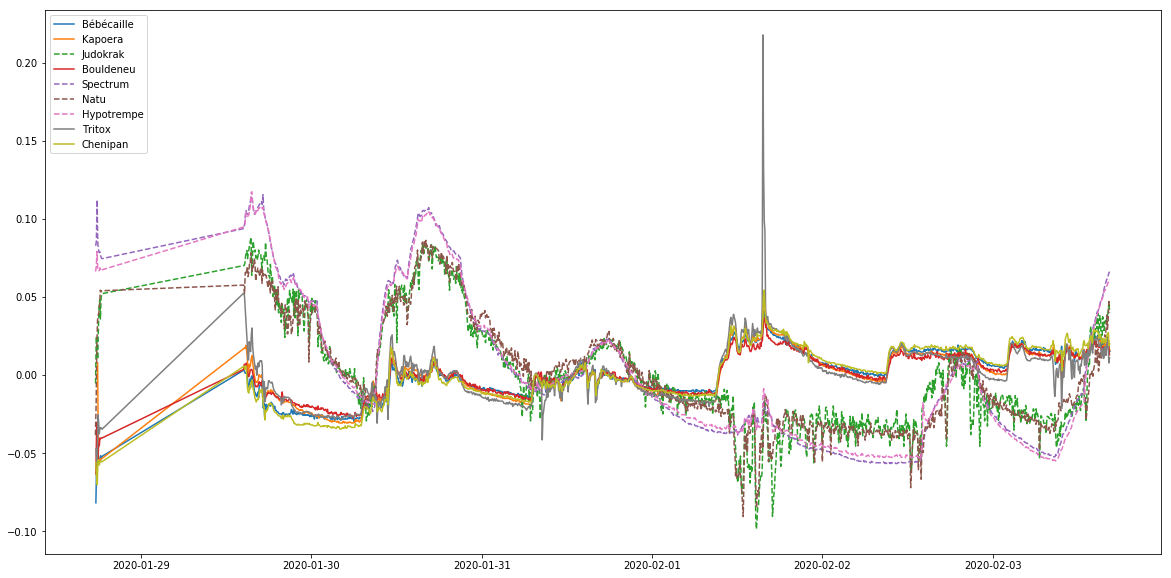

In [26]:
plot_by_device(data_set_normalized,"temperature")

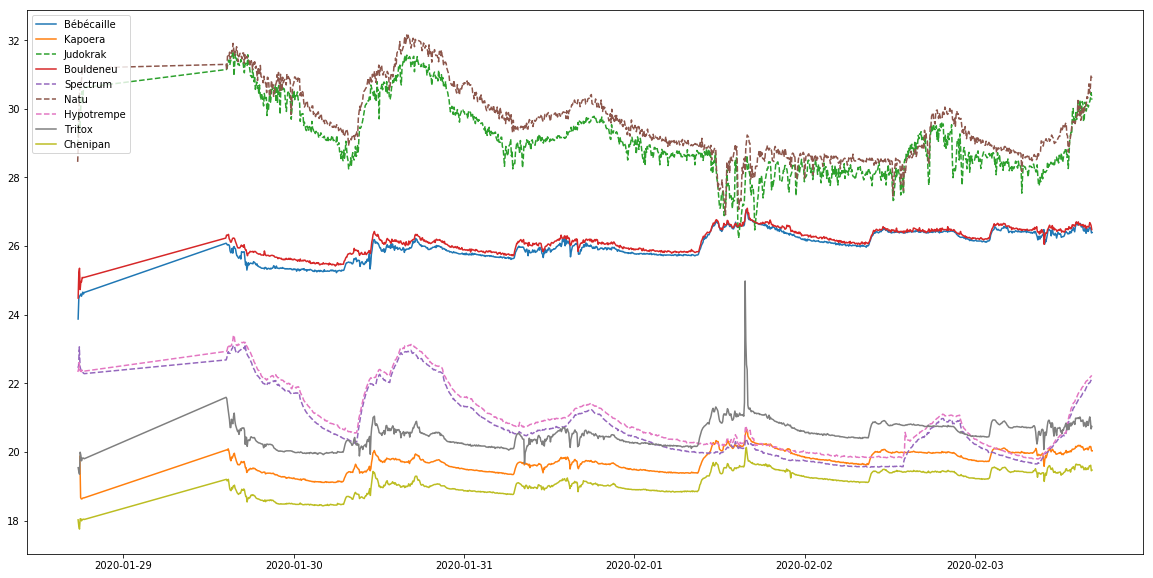

In [16]:
plot_by_device(data_set_scalar,"temperature")